# Регрессия

## Шаг 0. Импорт необходимых библиотек

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

## Шаг 1. Загрузка и предварительная обработка данных

Набор данных:
 - mpg – расход топлива (в милях на галлон);
 - cylinders – число цилиндров в двигателе;
 - displacement – объем двигателя (в кубических дюймах);
 - horsepower – мощность (в лошадиных силах);
 - weight – масса автомобиля (в фунтах);
 - acceleration – разгон до 60 миль/час (в секундах);
 - model year – год выпуска модели;
 - origin – регион производства (1 – США, 2 – Европа, 3 – Юго-Восточная Азия);
 - car name – наименование модели.


In [15]:
df = pd.read_csv('auto-mpg.csv')

In [16]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [18]:
# Выведем количество пропусков в каждом столбце
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [19]:
# Удаляем строки с пропущенными значениями
df.dropna(inplace=True)

In [20]:
# Удаляем дубликаты
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"\nУдалено дубликатов: {initial_shape[0] - df.shape[0]} строк(и)")


Удалено дубликатов: 0 строк(и)


## Шаг 2. Определение типов данных и шкал измерения

In [21]:
# Просмотр типов данных
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [22]:
# Приведение категориальных переменных к типу 'category'
df['origin'] = df['origin'].astype('category')
# Поле 'car name' оставляем как строку (оно не будет использоваться в регрессионном анализе)

## Шаг 3. Визуализация данных

### 3.1 График зависимости расхода топлива (mpg) от массы автомобиля (weight)

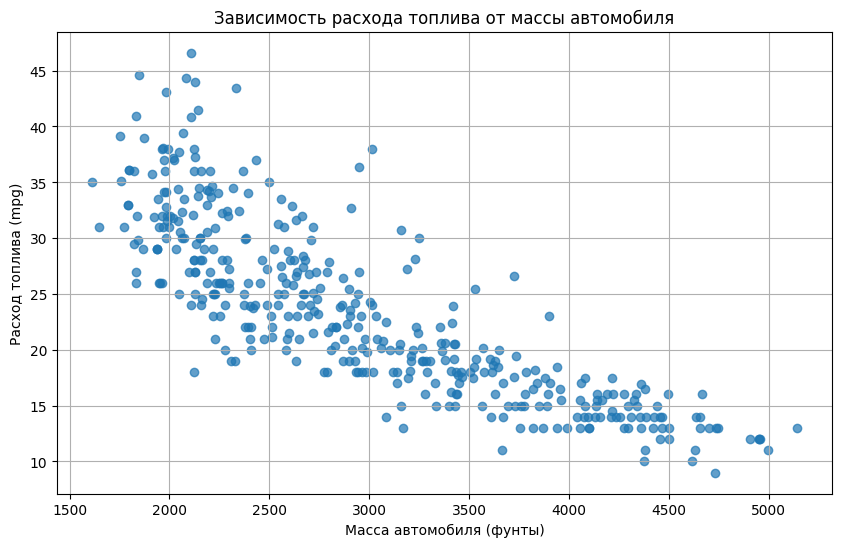

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['mpg'], alpha=0.7)
plt.xlabel('Масса автомобиля (фунты)')
plt.ylabel('Расход топлива (mpg)')
plt.title('Зависимость расхода топлива от массы автомобиля')
plt.grid(True)
plt.show()

### 3.2 Гистограммы для основных признаков

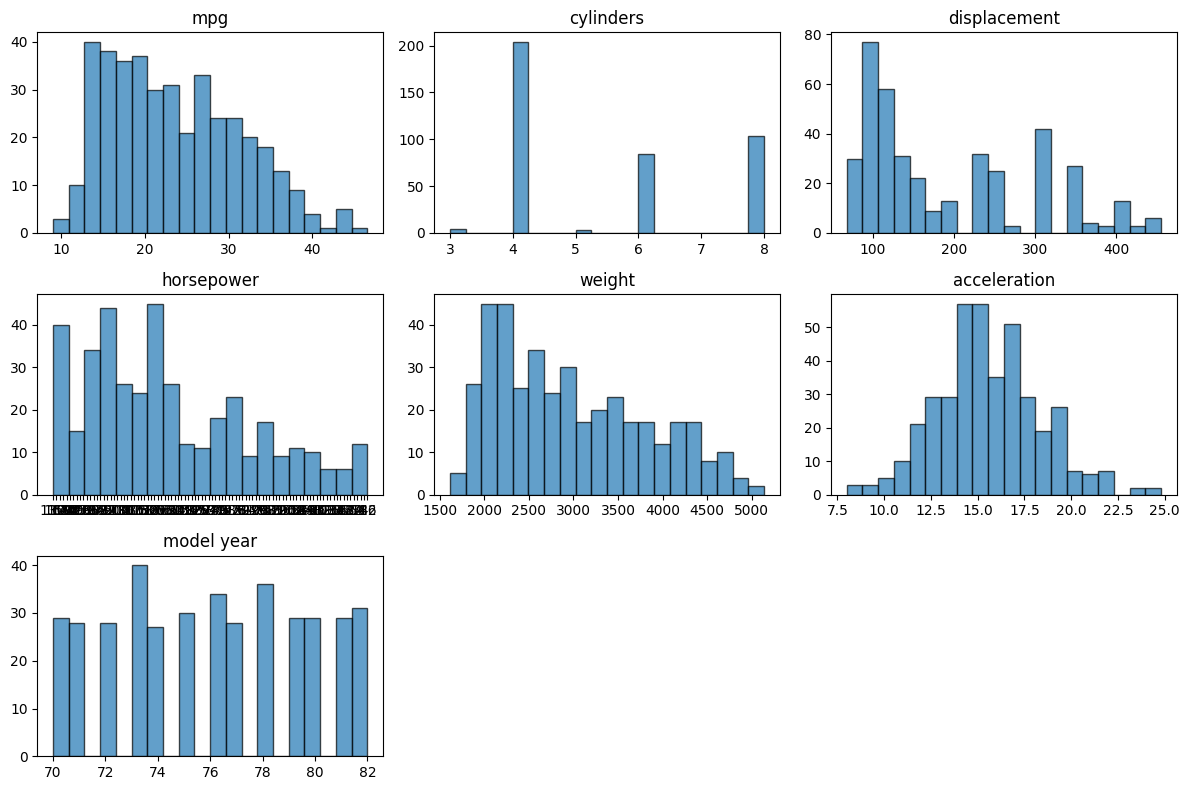

In [24]:
plt.figure(figsize=(12, 8))
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[feature], bins=20, edgecolor='black', alpha=0.7)
    plt.title(feature)
    plt.tight_layout()
plt.show()

### 3.3 Корреляционная матрица для количественных признаков

Пропущенные значения после преобразования:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
dtype: int64

Корреляционная матрица:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration  model year  
mpg               0.423329    0.580541  
cylinders        -0.504683   -0.345647  
displacement     -0.543800   -0.369855  
horsepower       -0.689196   -0.416361  
wei

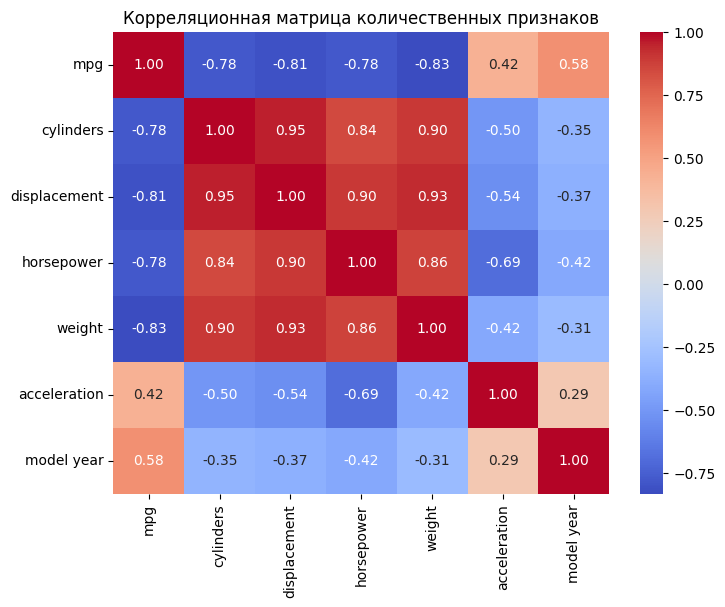

In [30]:
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Пропущенные значения после преобразования:")
print(df[numeric_cols].isnull().sum())

df.dropna(subset=numeric_cols, inplace=True)

corr_matrix = df[numeric_cols].corr()
print("\nКорреляционная матрица:")
print(corr_matrix)

# Визуализация корреляционной матрицы с использованием тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица количественных признаков')
plt.show()

## Шаг 4. Анализ взаимосвязей факторов

### 1. Критерии сравнения групп для связи количественных (или порядковых) факторов с категориальными

Пусть нас интересует, влияет ли регион производства (origin) на расход топлива (mpg). Здесь origin – категориальная переменная, а mpg – количественная.

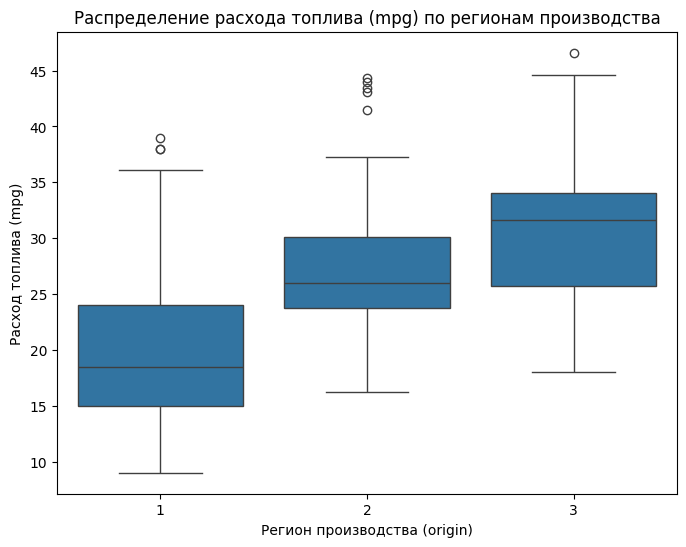

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('Распределение расхода топлива (mpg) по регионам производства')
plt.xlabel('Регион производства (origin)')
plt.ylabel('Расход топлива (mpg)')
plt.show()

Для сравнения средних значений в более чем двух группах применим однофакторный дисперсионный анализ (ANOVA).


In [35]:
from scipy import stats

# Разбиваем данные на группы по 'origin'
group1 = df[df['origin'] == 1]['mpg']
group2 = df[df['origin'] == 2]['mpg']
group3 = df[df['origin'] == 3]['mpg']

anova_result = stats.f_oneway(group1, group2, group3)
print("ANOVA - F-статистика:", anova_result.statistic)
print("ANOVA - p-значение:", anova_result.pvalue)

ANOVA - F-статистика: 96.60153016314952
ANOVA - p-значение: 8.673818448010683e-35


### 2. Корреляционный анализ для количественных и порядковых величин

Проведем корреляционный анализ между расходом топлива (mpg) и массой автомобиля (weight).

 - Коэффициент Пирсона:

In [36]:
pearson_corr, p_value_pearson = stats.pearsonr(df['mpg'], df['weight'])
print("Корреляция Пирсона между mpg и weight:", pearson_corr)
print("p-значение для корреляции Пирсона:", p_value_pearson)


Корреляция Пирсона между mpg и weight: -0.8322442148315752
p-значение для корреляции Пирсона: 6.015296051437158e-102


Данные результаты свидетельствуют о том, что между группами, определёнными переменной origin, существуют статистически значимые различия в среднем значении расхода топлива (mpg). Поскольку p-значение существенно меньше 0.05, нулевая гипотеза (о равенстве средних значений mpg для всех регионов) отвергается. Это говорит о том, что регион производства оказывает влияние на расход топлива.

- Коэффициент Спирмена:

In [37]:
spearman_corr, p_value_spearman = stats.spearmanr(df['mpg'], df['weight'])
print("Корреляция Спирмена между mpg и weight:", spearman_corr)
print("p-значение для корреляции Спирмена:", p_value_spearman)


Корреляция Спирмена между mpg и weight: -0.8755851198739869
p-значение для корреляции Спирмена: 2.662377938025222e-125


Оба коэффициента корреляции (Пирсона и Спирмена) указывают на сильную отрицательную взаимосвязь между расходом топлива (mpg) и весом автомобиля (weight). Это означает, что с увеличением веса автомобиля наблюдается снижение его топливной эффективности. Очень низкие p-значения подтверждают статистическую значимость этой взаимосвязи.

### 3. Таблицы сопряженности для оценки связи двух категориальных факторов

Построим таблицу сопряженности для переменных origin и cylinders (при условии, что последние можно трактовать как категориальные, либо как порядковые).

In [38]:
# Построение таблицы сопряженности:
contingency_table = pd.crosstab(df['origin'], df['cylinders'])
print("Таблица сопряженности между origin и cylinders:")
print(contingency_table)


Таблица сопряженности между origin и cylinders:
cylinders  3   4  5   6    8
origin                      
1          0  69  0  73  103
2          0  61  3   4    0
3          4  69  0   6    0


In [39]:
# Статистический тест (хи-квадрат):
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Хи-квадрат статистика:", chi2)
print("p-значение для теста хи-квадрат:", p)
print("Степени свободы:", dof)
print("Ожидаемые частоты:\n", expected)


Хи-квадрат статистика: 180.71869417150074
p-значение для теста хи-квадрат: 7.272757264481584e-35
Степени свободы: 8
Ожидаемые частоты:
 [[  2.5        124.375        1.875       51.875       64.375     ]
 [  0.69387755  34.52040816   0.52040816  14.39795918  17.86734694]
 [  0.80612245  40.10459184   0.60459184  16.72704082  20.75765306]]


Тест хи-квадрат показывает, что между переменными origin и cylinders существует статистически значимая зависимость (p-значение ≪ 0.05). Это означает, что распределение числа цилиндров существенно зависит от региона производства.

### Вывод

1. Групповое сравнение (ANOVA):
Различия в среднем значении расхода топлива (mpg) между автомобилями из разных регионов производства являются статистически значимыми, что подтверждает влияние региона на топливную эффективность.

2. Корреляционный анализ:
Существует сильная отрицательная взаимосвязь между расходом топлива и весом автомобиля, что указывает на то, что более тяжелые автомобили имеют меньшую топливную эффективность.

3. Анализ категориальных переменных:
Между регионами производства и числом цилиндров наблюдаются значимые различия, что подтверждается результатами теста хи-квадрат.

Таким образом, все методы анализа (ANOVA, корреляционный анализ и хи-квадрат тест) указывают на то, что:

 - Регион производства влияет на расход топлива и распределение числа цилиндров.

 - Вес автомобиля является важным фактором, отрицательно коррелирующим с топливной эффективностью.

# Шаг 5

Нулевая гипотеза (H₀):
Среднее значение расхода топлива (mpg) для автомобилей, произведённых в разных регионах (origin), одинаково, то есть

H
0
​
 :μ
1
​
 =μ
2
​
 =μ
3
​


 где
𝜇
1
μ
1
​
 ,
𝜇
2
μ
2
​
  и
𝜇
3
μ
3
​
  — средние значения mpg для автомобилей из регионов 1, 2 и 3 соответственно.

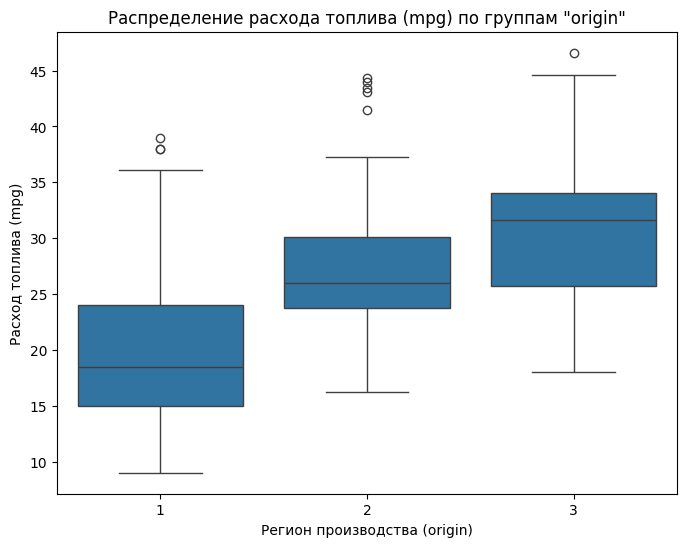

In [31]:
# Визуализация данных: построение boxplot для mpg по группам 'origin'
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('Распределение расхода топлива (mpg) по группам "origin"')
plt.xlabel('Регион производства (origin)')
plt.ylabel('Расход топлива (mpg)')
plt.show()

<b>Обоснование выбора статистического критерия</b>

Поскольку у нас имеется одна количественная переменная (mpg) и один категориальный признак (origin) с тремя категориями, для проверки различий между группами используется однофакторный дисперсионный анализ (ANOVA).
ANOVA позволяет сравнить средние значения более чем двух групп, оценив соотношение межгрупповой и внутригрупповой дисперсии.

In [32]:
from scipy.stats import stats

# Разделим данные на группы по значению 'origin'
group1 = df[df['origin'] == 1]['mpg']
group2 = df[df['origin'] == 2]['mpg']
group3 = df[df['origin'] == 3]['mpg']

# Проведем однофакторный дисперсионный анализ (ANOVA)
anova_result = stats.f_oneway(group1, group2, group3)

# Выведем результаты теста
print("Результаты ANOVA:")
print("F-статистика:", anova_result.statistic)
print("p-значение:", anova_result.pvalue)

# Интерпретация результата:
alpha = 0.05  # уровень значимости
if anova_result.pvalue < alpha:
    print("p-значение меньше 0.05, нулевая гипотеза отвергается.")
    print("Существует статистически значимая разница в среднем значении mpg между группами.")
else:
    print("p-значение больше или равно 0.05, нет оснований отклонять нулевую гипотезу.")
    print("Нет статистически значимых различий в среднем значении mpg между группами.")

Результаты ANOVA:
F-статистика: 96.60153016314952
p-значение: 8.673818448010683e-35
p-значение меньше 0.05, нулевая гипотеза отвергается.
Существует статистически значимая разница в среднем значении mpg между группами.


/tmp/ipykernel_2679647/4001531921.py:9: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  anova_result = stats.f_oneway(group1, group2, group3)


<b>Формирование вывода по результатам применения критерия</b>

Так как p-значение (≈ 8.67×10⁻³⁵) значительно меньше уровня значимости (α = 0.05), мы отвергаем нулевую гипотезу. Это означает, что между группами существует статистически значимая разница в среднем значении расхода топлива (mpg). То есть регион производства оказывает существенное влияние на экономичность автомобилей.

# Шаг 6

## 1. Формирование данных для регрессии

In [40]:
# Выбираем количественные признаки
numeric_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
X = df[numeric_features].copy()

In [41]:
# Преобразуем категориальный признак 'origin' в dummy-переменные (one-hot encoding)
origin_dummies = pd.get_dummies(df['origin'], prefix='origin', drop_first=True)
X = pd.concat([X, origin_dummies], axis=1)

In [42]:
# Целевая переменная
y = df['mpg']

In [43]:
# Разделение данных на обучающую (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Построение модели линейной регрессии

In [44]:
# Создание и обучение модели
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Предсказание на тестовой выборке
y_pred_linear = linear_model.predict(X_test)

In [46]:
# Вычисление метрик качества
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Линейная регрессия:")
print("MSE: {:.2f}".format(mse_linear))
print("RMSE: {:.2f}".format(rmse_linear))
print("MAE: {:.2f}".format(mae_linear))
print("R2: {:.2f}".format(r2_linear))

Линейная регрессия:
MSE: 10.60
RMSE: 3.26
MAE: 2.46
R2: 0.79


In [47]:
# Интерпретация коэффициентов модели (значимость можно оценить дополнительно через статистические тесты)
print("\nКоэффициенты линейной модели:")
coeff_linear = pd.Series(linear_model.coef_, index=X.columns)
print(coeff_linear)
print("Перехват (Intercept):", linear_model.intercept_)


Коэффициенты линейной модели:
cylinders      -0.342101
displacement    0.019206
horsepower     -0.021620
weight         -0.006423
acceleration    0.042198
model year      0.797161
origin_2        2.875499
origin_3        3.205969
dtype: float64
Перехват (Intercept): -19.33193002500678


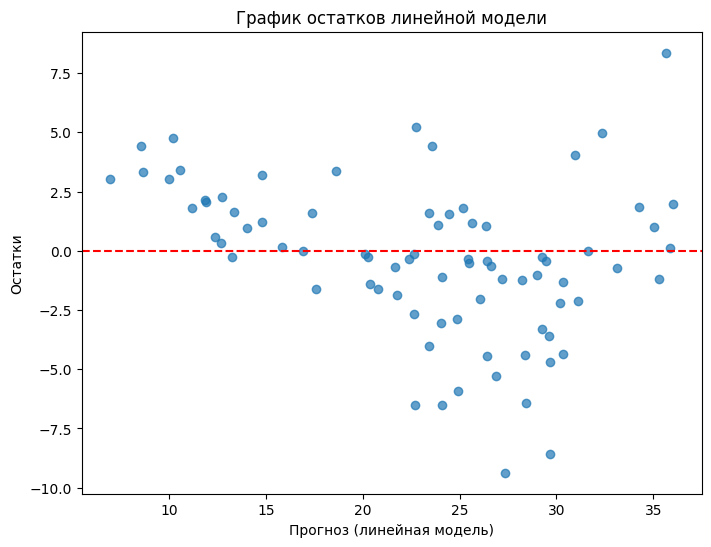

In [48]:
# Анализ остатков: строим график рассеяния предсказанных значений и остатков
residuals_linear = y_test - y_pred_linear
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_linear, residuals_linear, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Прогноз (линейная модель)')
plt.ylabel('Остатки')
plt.title('График остатков линейной модели')
plt.show()

## 3. Построение нелинейной модели (полиномиальная регрессия, degree=2)

In [49]:
# Применяем полиномиальное преобразование признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [50]:
# Создаем и обучаем модель линейной регрессии на полиномиальных признаках
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [51]:
# Предсказание на тестовой выборке для полиномиальной модели
y_pred_poly = poly_model.predict(X_test_poly)

In [52]:
# Вычисление метрик качества для полиномиальной модели
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nПолиномиальная регрессия (degree=2):")
print("MSE: {:.2f}".format(mse_poly))
print("RMSE: {:.2f}".format(rmse_poly))
print("MAE: {:.2f}".format(mae_poly))
print("R2: {:.2f}".format(r2_poly))


Полиномиальная регрессия (degree=2):
MSE: 7.75
RMSE: 2.78
MAE: 2.03
R2: 0.85


In [53]:
# Коэффициенты полиномиальной модели (будет много коэффициентов из-за взаимодействий)
print("\nКоэффициенты полиномиальной модели:")
print(poly_model.coef_)
print("Перехват (Intercept):", poly_model.intercept_)


Коэффициенты полиномиальной модели:
[ 1.16483859e+01 -6.45758386e-01  1.74451506e-01  1.56944107e-02
 -8.78703359e+00 -6.67294915e+00 -1.93116316e+01 -1.60012147e+01
 -8.93858117e-01  1.06052216e-02  1.68467502e-02  1.51810005e-03
  4.14761846e-01 -2.16842605e-01 -1.79692234e-01  2.23200910e+00
 -2.40458873e-05  1.04506816e-04  1.23127417e-06 -2.52724924e-03
  7.94770074e-03 -3.99939026e-02  2.10841124e-02 -1.00969016e-04
 -3.54582087e-05 -6.48121083e-03 -1.51792227e-03  2.08865829e-02
 -2.09230849e-02  3.96178433e-07  7.44098212e-06 -3.60388226e-04
  4.20514861e-04 -2.94792965e-04  1.61272717e-03  9.27902991e-02
  1.08112847e+00  6.36875098e-01  4.45566979e-02  3.17111683e-01
  1.78946914e-01 -1.93116316e+01  0.00000000e+00 -1.60012147e+01]
Перехват (Intercept): 331.06210908975044


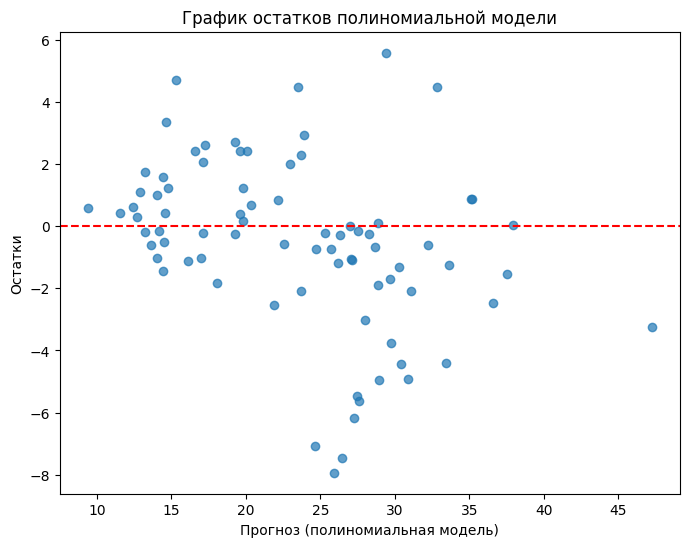

In [54]:
# Анализ остатков для полиномиальной модели
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_poly, residuals_poly, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Прогноз (полиномиальная модель)')
plt.ylabel('Остатки')
plt.title('График остатков полиномиальной модели')
plt.show()

## 5. Сравнение моделей и итоговый вывод

In [56]:
print("\nСравнение моделей:")
print("Линейная модель - R2: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(r2_linear, rmse_linear, mae_linear))
print("Полиномиальная модель - R2: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(r2_poly, rmse_poly, mae_poly))

if r2_poly > r2_linear:
    best_model = "Полиномиальная модель"
else:
    best_model = "Линейная модель"

print("\nИтоговый вывод:")
print("Построены две модели для прогнозирования расхода топлива (mpg) на основе факторов автомобиля.")
print("Анализ коэффициентов, графики остатков и вычисленные метрики (MSE, RMSE, MAE, R2) позволяют оценить адекватность моделей.")
print("Прогноз для нового автомобиля выполнен с использованием обеих моделей.")
print("Сравнение моделей показало, что {} имеет лучшие показатели качества (более высокий R2 и/или меньшие ошибки).".format(best_model))


Сравнение моделей:
Линейная модель - R2: 0.79, RMSE: 3.26, MAE: 2.46
Полиномиальная модель - R2: 0.85, RMSE: 2.78, MAE: 2.03

Итоговый вывод:
Построены две модели для прогнозирования расхода топлива (mpg) на основе факторов автомобиля.
Анализ коэффициентов, графики остатков и вычисленные метрики (MSE, RMSE, MAE, R2) позволяют оценить адекватность моделей.
Прогноз для нового автомобиля выполнен с использованием обеих моделей.
Сравнение моделей показало, что Полиномиальная модель имеет лучшие показатели качества (более высокий R2 и/или меньшие ошибки).
